## Assignment Graded Challenge 3

Nama : Raden Mas Xyla Ramadhan 

Batch 13

### Dataset Description
- Pada graded challenge ini, data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.

- Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab bigquery-public-data atau klik link berikut atau link berikut untuk langsung menuju ke tabel.

### Assignment Problems

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.

### Import pustaka yang dibutuhkan

In [1]:
#import library
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Salin query yang telah dibuat di Google Cloud Platform

SELECT load_time, load_type, load_weight, dropoff_site

FROM bigquery-public-data.austin_waste.waste_and_diversion

LIMIT 150000

 ### Loading Data

In [2]:
#loading data
df = pd.read_csv('h8dsft_P0GC3_xyla_ramadhan.csv')

In [3]:
#tampilkan head
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


In [4]:
#tampilkan tail
df.tail()

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


##### 1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

### Data Preprocessing

In [5]:
# Menampilkan missing value
df.isna().sum() 

load_time          0
load_type          0
load_weight     5066
dropoff_site       0
dtype: int64

In [6]:
# Mengganti missing value menggunakan median
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())

In [7]:
# Cek apakah dataset masih ada missing value
df.isna().sum() 

load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

In [8]:
# Cek apakah dataset ada negative value
df.sort_values('load_weight',ascending=True)

,load_time,load_type,load_weight,dropoff_site
128289,2011-09-06 12:00:00 UTC,RECYCLING - SINGLE STREAM,-4480.0,TDS - MRF
96280,2014-02-01 12:10:00 UTC,RECYCLING - SINGLE STREAM,0.0,TDS - MRF
47058,2005-03-01 10:43:00 UTC,RECYCLING - COMINGLE,0.0,MRF
89556,2006-01-12 02:30:00 UTC,RECYCLED METAL,0.0,MRF
44318,2008-04-21 07:01:00 UTC,RECYCLING - PAPER,0.0,MRF
...,...,...,...,...
102380,2019-06-27 02:14:00 UTC,GARBAGE COLLECTIONS,30560.0,TDS - MRF
90084,2008-04-10 10:20:00 UTC,SWEEPING,31857.0,ELMONT
103455,2011-01-14 01:23:00 UTC,GARBAGE COLLECTIONS,35980.0,TDS - MRF
136518,2013-07-30 02:16:00 UTC,RECYCLING - SINGLE STREAM,45305.0,TDS - MRF


In [9]:
# Ganti negative value dengan 0
df[df['load_weight'] < 0] = 0

In [10]:
# Cek apakah masih ada dataset negative value
df.sort_values('load_weight',ascending=True)

,load_time,load_type,load_weight,dropoff_site
96280,2014-02-01 12:10:00 UTC,RECYCLING - SINGLE STREAM,0.0,TDS - MRF
47058,2005-03-01 10:43:00 UTC,RECYCLING - COMINGLE,0.0,MRF
89556,2006-01-12 02:30:00 UTC,RECYCLED METAL,0.0,MRF
44318,2008-04-21 07:01:00 UTC,RECYCLING - PAPER,0.0,MRF
50375,2007-05-15 12:00:00 UTC,RECYCLING - PAPER,0.0,MRF
...,...,...,...,...
102380,2019-06-27 02:14:00 UTC,GARBAGE COLLECTIONS,30560.0,TDS - MRF
90084,2008-04-10 10:20:00 UTC,SWEEPING,31857.0,ELMONT
103455,2011-01-14 01:23:00 UTC,GARBAGE COLLECTIONS,35980.0,TDS - MRF
136518,2013-07-30 02:16:00 UTC,RECYCLING - SINGLE STREAM,45305.0,TDS - MRF


##### 2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

### Data Exploratory

#### Melihat rentang waktu pengambilan data


In [11]:
# mengubah datatype load_time ke date
df['load_time'] = pd.to_datetime(df['load_time'])

In [12]:
# cek datatype load_time apakah sudah berubah ke date
df.dtypes

load_time       datetime64[ns, UTC]
load_type                    object
load_weight                 float64
dropoff_site                 object
dtype: object

In [13]:
#set format date
pd.to_datetime(df['load_time'], format='%b %d, %Y')

0        2009-08-07 11:51:00+00:00
1        2008-04-11 12:31:00+00:00
2        2009-01-16 12:58:00+00:00
3        2009-07-10 11:21:00+00:00
4        2006-02-03 12:36:00+00:00
                    ...           
149995   2011-08-17 12:45:00+00:00
149996   2011-06-08 10:59:00+00:00
149997   2012-04-11 12:09:00+00:00
149998   2011-08-31 02:50:00+00:00
149999   2011-07-20 11:21:00+00:00
Name: load_time, Length: 150000, dtype: datetime64[ns, UTC]

In [14]:
#sort values load time dari terlama sampai terbaru
df.sort_values('load_time',ascending=True)

,load_time,load_type,load_weight,dropoff_site
128289,1970-01-01 00:00:00+00:00,0,0.0,0
26375,2000-01-26 12:39:00+00:00,RECYCLING - PAPER,2940.0,MRF
53702,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF
53635,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF
20901,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2940.0,MRF
...,...,...,...,...
125955,2021-07-11 07:05:24+00:00,RECYCLING - SINGLE STREAM,5800.0,TDS - MRF
140990,2021-07-11 07:05:51+00:00,RECYCLING - SINGLE STREAM,0.0,TDS - MRF
94235,2021-07-11 07:07:01+00:00,GARBAGE COLLECTIONS,5800.0,ZILKER
94234,2021-07-11 07:07:01+00:00,GARBAGE COLLECTIONS,5800.0,ZILKER


Dari Dataset diatas rentang waktu pengambilan data dari tahun 2000-01-26 sampai tahun 2021-07-11

#### Ada apa saja tipe load sampah di kota Austin berdasarkan data


In [15]:
#filter data tipe load sampah
df.groupby(['load_type'])[['load_weight']].mean().sort_values(by='load_weight')

,load_weight
load_type,
0,0.000000
RECYCLING - PLASTIC BAGS,170.000000
DEAD ANIMAL,312.903226
TIRES,2027.520594
LITTER,2184.615385
RECYCLING - COMINGLE,3250.953696
MIXED LITTER,4186.153846
RECYCLING - PAPER,4407.794990
BRUSH,5118.453125


#### Mengetahui tempat pembuangan sampah ada dimana saja

In [16]:
#filter data dropoff site ada dimana saja
df.groupby(['dropoff_site'])[['load_weight']].mean().sort_values(by='load_weight')

,load_weight
dropoff_site,
0,0.000000
MRF,5305.141835
WILCAB,5817.066086
ELMONT,5832.501368
CLARKSON,5833.264249
KRAMER,5855.632911
PARK BEND,7474.267677
ZILKER,9316.125000
TDS - MRF,10116.959564


##### 3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

#### Central Tendency

In [17]:
#hitung mean load_weight
df['load_weight'].mean()

7088.681486666666

Insight

rata rata load_weight pada 150.000 dataset yang diambil sebesar 7088.6814

In [18]:
#hitung median load_weight
df['load_weight'].median()

5800.0

Insight
 
median load_weight pada 150.000 dataset yang diambil sebesar 5800

In [19]:
#hitung mode load_weight
df['load_weight'].mode()

0    5800.0
Name: load_weight, dtype: float64

Insight 

modus load_weight pada 150.000 dataset yang diambil sebesar 5800

Alasan kenapa Modus dan Median memiliki angka yang sama adalah karena ketika ada 5066 missing value. 

Missing Value diisi dengan median, oleh karena itu ada 5066 file dengan load weight yang sama 

##### 4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

In [20]:
#cek berapa banyak dropoff_site
df.pivot_table(index=['dropoff_site'], aggfunc ='size')


dropoff_site
0                1
CLARKSON       386
ELMONT        1462
KRAMER         316
MRF          89625
PARK BEND      396
TDS - MRF    54036
WILCAB        2754
ZILKER        1024
dtype: int64

In [21]:
#cek rata rata load_weight per dropoff_site
df.groupby(['dropoff_site'])[['load_weight']].mean().sort_values(by='load_weight')

,load_weight
dropoff_site,
0,0.000000
MRF,5305.141835
WILCAB,5817.066086
ELMONT,5832.501368
CLARKSON,5833.264249
KRAMER,5855.632911
PARK BEND,7474.267677
ZILKER,9316.125000
TDS - MRF,10116.959564


In [22]:
#query load type
df.groupby(['dropoff_site'])[['load_type']].nunique().sort_values(by='load_type')

,load_type
dropoff_site,
0,1
CLARKSON,1
ELMONT,1
KRAMER,3
WILCAB,3
PARK BEND,4
ZILKER,6
TDS - MRF,12
MRF,14


Dari dataset tersebut site yang paling menarik perhatian adalah MRF karena site ini  load weight teringan sebesar 5305.141 dan memiliki load_type terbanyak, dari total 18 load type ada 14 load type yang dapat ditampung di dropoff site MRF 

##### 5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).`

Site yang saya pilih ada MRF. saya akan membandingkan Central tendency data yang dikeluarkan outlier nya dengan yang belum serta berapa persen jumlah outlier dari total data 

Langkah 1 Buat DataFrame baru dengan site yang dipilih yaitu site MRF

In [23]:
#buat dataframe MRF
df_MRF = df.loc[df['dropoff_site'] == 'MRF'] 
df_MRF

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00+00:00,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00+00:00,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00+00:00,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00+00:00,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00+00:00,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
89620,2008-10-10 01:30:00+00:00,RECYCLING - COMINGLE,6700.0,MRF
89621,2020-12-21 11:38:00+00:00,TIRES,1000.0,MRF
89622,2020-12-23 11:59:00+00:00,TIRES,1220.0,MRF
89623,2021-03-20 08:35:00+00:00,TIRES,520.0,MRF


Langkah 2 Cek Central Tendency site MRF

In [24]:
#hitung mean load_weight
df_MRF['load_weight'].mean()

5305.141835425384

In [25]:
#hitung median load_weight
df_MRF['load_weight'].median()

4260.0

In [26]:
#hitung mode load_weight
df_MRF['load_weight'].mode()

0    3460.0
Name: load_weight, dtype: float64

In [27]:
#hitung max load_weight
df_MRF['load_weight'].max()

27320.0

#### Outlier Handling Load Weight

cek skewness untuk mengetahui outlier handling


In [28]:
#tampilkan skewness value
df_MRF['load_weight'].skew()

1.0010205810425368

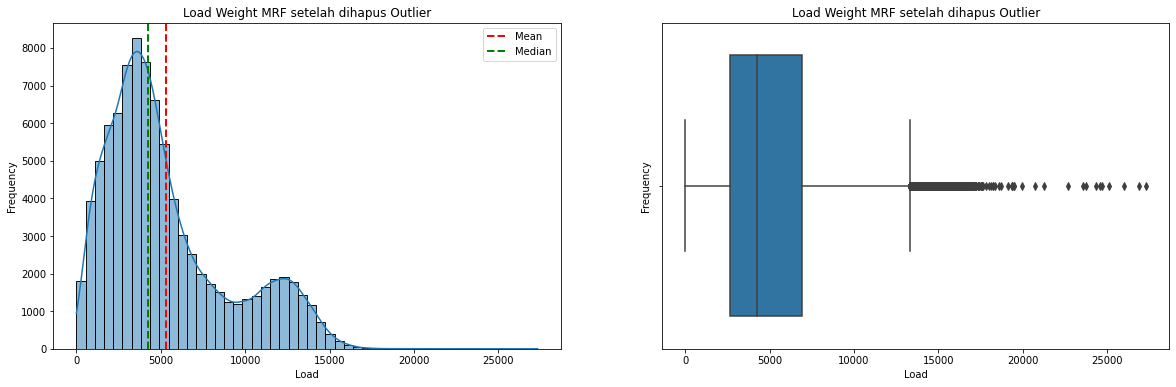

In [29]:
#tampilkan histogram plot dan boxplot 
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x=df_MRF.load_weight, data=df_MRF, bins=50, kde=True)
plt.axvline(df_MRF.load_weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_MRF.load_weight.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Load Weight MRF setelah dihapus Outlier')
plt.xlabel('Load')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x=df_MRF.load_weight, data=df_MRF)
plt.title('Load Weight MRF setelah dihapus Outlier')
plt.xlabel('Load')
plt.ylabel('Frequency')
plt.show()

dapat disimpulkan dari grafik diatas bahwa 

* `load_weight` : right-skewed (positively skewed)

maka akan dilakukan outlier handling menggunakan IQR.

In [30]:
#hitung IQR, lowerbound, dan upperbound
IQR = df_MRF.load_weight.quantile(0.75) - df_MRF.load_weight.quantile(0.25)
lower_bound = df_MRF.load_weight.quantile(0.25) - (IQR * 1.5)
upper_bound = df_MRF.load_weight.quantile(0.75) + (IQR * 1.5)

In [31]:
#tampilkan outlier MRF
df_MRF[(df_MRF.load_weight < lower_bound) | (df_MRF.load_weight > upper_bound)]


,load_time,load_type,load_weight,dropoff_site
86,2010-09-24 11:20:00+00:00,RECYCLING - SINGLE STREAM,13980.0,MRF
144,2010-12-17 01:23:00+00:00,RECYCLING - SINGLE STREAM,19360.0,MRF
243,2011-01-28 01:38:00+00:00,RECYCLING - SINGLE STREAM,15160.0,MRF
338,2010-08-27 01:31:00+00:00,RECYCLING - SINGLE STREAM,15220.0,MRF
572,2010-04-09 12:21:00+00:00,RECYCLING - SINGLE STREAM,14580.0,MRF
...,...,...,...,...
89597,2006-01-10 09:14:00+00:00,RECYCLED METAL,25100.0,MRF
89600,2006-01-10 12:00:00+00:00,RECYCLED METAL,20700.0,MRF
89606,2006-01-11 02:34:00+00:00,RECYCLED METAL,24680.0,MRF
89608,2006-01-10 02:30:00+00:00,RECYCLED METAL,26860.0,MRF


In [32]:
#print jumlah outlier MRF
print(f'Jumlah outlier MRF : {len(df_MRF[(df_MRF.load_weight < lower_bound) | (df_MRF.load_weight > upper_bound)])}')


Jumlah outlier MRF : 3471


Tentukan berapa persen jumlah outlier 

jumlah outlier   :3471 

jumlah data MRF  :89625

In [33]:
#outlier / data mrf
3471/89625*100

3.8728033472803345

Dapat disimpulkan bahwa Jumlah outlier hanya 3,87% dari jumlah data MRF

Menghilangkan outlier dari data frame

Langkah 4 Buat Data Frame baru MRF_no_outlier untuk memisahkan antara dataset mrf dengan outlier dan MRF tanpa outlier

In [34]:
#Buat Data Frame baru MRF_no_outlier untuk memisahkan antara dataset mrf dengan outlier dan MRF tanpa outlier
df_MRF_no_outlier = df_MRF[(df_MRF.load_weight > lower_bound) & (df_MRF.load_weight < upper_bound)]


Hitung Central Tendency MRF No outlier

In [35]:
#hitung median load_weight
df_MRF_no_outlier['load_weight'].mean()

4941.771792371799

In [36]:
#hitung median load_weight
df_MRF_no_outlier['load_weight'].median()

4140.0

In [37]:
#hitung median load_weight
df_MRF_no_outlier['load_weight'].mode()

0    3460.0
Name: load_weight, dtype: float64

In [38]:
#hitung max load_weight
df_MRF_no_outlier['load_weight'].max()

13320.0

Bandingkan Central Tendency MRF with outlier dengan MRF no outlier

In [39]:
# membandingkan modus MRF outlier dengan MRF_no_outlier
df_MRF['load_weight'].mode() == df_MRF_no_outlier['load_weight'].mode() 

0    True
Name: load_weight, dtype: bool

karena value sama tidak perlu melakukan selisih data

In [40]:
# membandingkan median MRF outlier dengan MRF_no_outlier
df_MRF_no_outlier['load_weight'].median() == df_MRF['load_weight'].median()

False

karena value tidak sama hitung selisih data median

In [41]:
#selisih data median
df_MRF['load_weight'].median() - df_MRF_no_outlier['load_weight'].median()  

120.0

In [42]:
# membandingkan mean MRF outlier dengan MRF_no_outlier
df_MRF['load_weight'].mean() == df_MRF_no_outlier['load_weight'].mean()

False

karena value tidak sama hitung selisih data mean

In [43]:
# selisih data mean
df_MRF['load_weight'].mean() - df_MRF_no_outlier['load_weight'].mean()

363.3700430535846

Insight yang didapat adalah 

Selisih data modus antara MRF outlier dengan MRF_no_outlier adalah 0

Selisih data median antara MRF outlier dengan MRF_no_outlier adalah 120

Selisih data mean antara MRF outlier dengan MRF_no_outlier adalah 363.37

Kesimpulan yang didapat adalah MRF tanpa outlier dapat meringankan rata-rata load weight 

karena data outlier terberat adalah 27320.0 sedangkan data tanpa outlier terberat adalah 13320.0 

sehingga ketika data outlier dihilangkan akan lebih ringan

##### 6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [44]:
# mengitung range adalah data terbesar dikurang data terkecil
df_MRF_no_outlier['load_weight'].max() - df_MRF_no_outlier['load_weight'].min()

13320.0

In [45]:
# mengitung variance
df_MRF_no_outlier['load_weight'].var()

10596379.846391998

In [46]:
# mengitung standar deviasi
df_MRF_no_outlier['load_weight'].std()

3255.20811107247

insight yang didapat adalah 

range yang didapat adalah 13320.0

variance yang didapat adalah 10596379.84

standar deviasi yang didapat adalah 3255.20


##### 7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

Data yang akan saya gunakan adalah site MRF (satu site saja) alasan saya menggunakan satu site saja karena site MRF sudah merupakan representasi dari keseluruhan data 

data MRF sebanyak 89625 dari total 150000 yaitu sudah mencakup 59,75% total data

In [47]:
#menghitung confidence_interval
ci = stats.norm.interval(0.95, df_MRF['load_weight'].mean(), df_MRF['load_weight'].std())
ci

(-1897.203737308695, 12507.487408159463)

bedasarkan data di atas jika Pemerintah kota berencana menambah site baru, saya sarankan pengolahan limbah maksimal dapat menampung beban muatan(load weight) sebesar 12507.487 untuk mengantisipasi lonjakan beban muatan disuatu hari nanti

##### 8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

##### Two Samples Independent Two Tailed Hypothesis 

Hipotesis: **Dari rata-rata MRF with outlier dengan MRF no outlier. Pemerintah kota ingin mencari tahu apakah perbedaan rata-rata tersebut signifikan atau tidak?**

Jadi:
- **H0: μ MRF with outlier  = μ MRF_no_outlier** (Perbedaan rata-rata MRF with outlier dengan MRF no outlier tidak signifikan)
- **H1: μ MRF with outlier  != μ MRF_no_outlier** (Perbedaan rata-rata MRF with outlier dengan MRF no outlier signifikan)



In [48]:
# hitung t_Stat dan p_Value
t_stat, p_val = stats.ttest_ind(df_MRF['load_weight'],df_MRF_no_outlier['load_weight'])
print(f'P-value: {p_val}')
print(f'T-stat: {t_stat}')

P-value: 2.696417033384672e-106
T-stat: 21.9132770937185


In [49]:
# buat kondisi apabila p value <= 0.05
if p_val <= 0.05:
    print("Menolak Null Hypothesis (H0), menerima Alternative Hypothesis (H1).")
elif p_val > 0.05:
    print("Menerima Null Hypothesis (H0), menolak Alternative Hypothesis (H1).")

Menolak Null Hypothesis (H0), menerima Alternative Hypothesis (H1).


Kesimpulan yang bisa saya simpulkan untuk pemerintah kota adalah dari hipotesis testing diatas adalah perbedaan rata-rata MRF with outlier dengan MRF no outlier signifikan

diperkuat dengan selisih data mean antara MRF outlier dengan MRF_no_outlier adalah 363.37



##### 9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

Kesimpulan dari perhitungan analisa yang telah saya lakukan 

- Site yang paling menarik adalah MRF karena mencakup 59,75% data, memiliki load weight teringan sebesar 5305.141 dan memiliki load type terbanyak, dari total 18 load type ada 14 load type yang dapat ditampung di dropoff site MRF 

- Selisih data mean antara MRF outlier dengan MRF_no_outlier adalah 363.37

- Kesimpulan yang didapat adalah MRF tanpa outlier dapat meringankan rata-rata load weight karena data outlier terberat adalah 27320.0 sedangkan data tanpa outlier terberat adalah 13320.0 
sehingga ketika data outlier dihilangkan akan lebih ringan

- Bedasarkan Confindence Interval jika Pemerintah kota berencana menambah site baru, saya sarankan pengolahan limbah maksimal dapat menampung beban muatan(load weight) sebesar 12507.487 untuk mengantisipasi lonjakan beban muatan disuatu hari nanti

- Kesimpulan yang bisa saya simpulkan untuk pemerintah kota adalah dari hipotesis testing diatas adalah perbedaan rata-rata MRF with outlier dengan MRF no outlier signifikan


### Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

**1. Apa perbedaan statistik deskriptif dan inferensial?**

Perbedaan Statistik Deskriptif dan Inferensial

1) Statistik Deskriptif adalah statistik yang tingkat pekerjaannya mencakup cara-cara menghimpun,
menyusun atau mengatur, mengolah, menyajikan dan menganalisis data angka, agar dapat memberikan
gambaran yang teratur, ringkas dan jelas mengenai
suatu gejala, peristiwa atau keadaan. 


![deskriptif](https://i.ibb.co/52GXQHL/deskrip.jpg)

2) Statistik Inferensial terkait dengan penarikan kesimpulan atau pendugaan populasi dari sampel melalui pengujian hipotesis dan pengujian statistik dengan memanfaatkan informasi dari sampel yang dihasilkan dari Statistik Deskriptif

![inferensial](https://i.ibb.co/G0JFNHg/infer.jpg)


**2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?**

metrik yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal adalah semuanya karena syarat normal distribusi adalah median = modus = mean

sedangkan yang tidak terdistribusi normal memiliki skewness atau kemiringan 

Apakah sama atau berbeda?

Distribusi normal menggunakan perhitungan 

Outliers=mean+/-3*std.

Sedangkan skewness menggunakan perhitungan 

IQR = Q3 - Q1 

lower = Q1 - (IQR * 1.5)

upper = Q3 + (IQR * 1.5)


**3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!**

Teknik yang saya pakai adalah teknik Tukey's rule atau IQR karena bedasarkan data 

variabel terdistribusi miring (positively skew) maka teknik yang paling cocok adalah menggunakan teknik Tukey's rule atau IQR




**4. Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?**

central tendency yang dipakai oleh Convidence interval adalah mean

Convidence Interval adalah salah satu parameter lain untuk mengukur seberapa akurat Mean sebuah sample mewakili (mencakup) nilai Mean Populasi sesungguhnya.

oleh karena itu saya menggunakan sample site MRF untuk menghitung Convidence interval dan mendapatkan hasil 12507.487



**5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?**

jenis uji hipotesis yang saya terapkan adalah Two Samples Independent Two Tailed Hypothesis 

alasan saya menggunakan Two Samples Independent Two Tailed Hypothesis adalah 

karena saya ingin berhipotesis apakah perbedaan rata-rata dua populasi yaitu MRF with outlier dengan MRF no outlier signifikan secara statistik

dan hasil yang didapat adalah signifikan

